## Single Spectrum-sp500logreturn-daily

In [14]:
import numpy as np
np.random.seed(30821)

import cv2
import os
from PIL import Image
import keras

In [15]:
os.environ['KERAS_BACKEND']='tensorflow'

image_directory='/Users/luzhang/Desktop/sp500_spectrum/'
SIZE=64
dataset=[]
label=[]

In [16]:
up_images=os.listdir(image_directory+'upspectrum/')
for i, image_name in enumerate(up_images):
        if(image_name.split('.')[1]=='png'):
                image=cv2.imread(image_directory+'upspectrum/'+image_name)
                image=Image.fromarray(image, 'RGB')
                image=image.resize((SIZE, SIZE))
                dataset.append(np.array(image))
                label.append(1)
                
down_images=os.listdir(image_directory+'downspectrum/')
for i, image_name in enumerate(down_images):
        if(image_name.split('.')[1]=='png'):
                image=cv2.imread(image_directory+'downspectrum/'+image_name)
                image=Image.fromarray(image, 'RGB')
                image=image.resize((SIZE, SIZE))
                dataset.append(np.array(image))
                label.append(0)

In [17]:
print(len(dataset))

3068


In [18]:
INPUT_SHAPE=(SIZE,SIZE,3)# change to (SIZE, SIZE, 3)
inp=keras.layers.Input(shape=INPUT_SHAPE)

conv1=keras.layers.Conv2D(32, kernel_size=(3,3),
                          activation='relu',padding='same')(inp)
pool1=keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
norm1=keras.layers.BatchNormalization(axis=-1)(pool1)
drop1=keras.layers.Dropout(rate=0.2)(norm1)

conv2=keras.layers.Conv2D(32, kernel_size=(3,3),
                          activation='relu',padding='same')(drop1)
pool2=keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2=keras.layers.BatchNormalization(axis=-1)(pool2)
drop2=keras.layers.Dropout(rate=0.2)(norm2)

flat=keras.layers.Flatten()(drop2) # Flatten the matrix to get it ready for density

hidden1=keras.layers.Dense(512, activation='relu')(flat)
norm3=keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3=keras.layers.Dropout(rate=0.2)(norm3)

hidden2=keras.layers.Dense(256, activation='relu')(drop3)
norm4=keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4=keras.layers.Dropout(rate=0.2)(norm4)

out=keras.layers.Dense(2,activation='sigmoid')(drop4) # units=1 gives errors

model=keras.Model(inputs=inp, outputs=out)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',# Check between binary_crossent
              metrics=['accuracy'])

print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0     

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test=train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=0)

history=model.fit(np.array(X_train), y_train, batch_size=64, verbose=1, epochs=50,validation_split=0.1, shuffle=False)


Epoch 1/50
35/35 [==============================] - 4s 99ms/step - loss: 1.1104 - accuracy: 0.5359 - val_loss: 1.1643 - val_accuracy: 0.5650
Epoch 2/50
35/35 [==============================] - 3s 97ms/step - loss: 0.8791 - accuracy: 0.5599 - val_loss: 0.7333 - val_accuracy: 0.6382
Epoch 3/50
35/35 [==============================] - 3s 93ms/step - loss: 0.7841 - accuracy: 0.5649 - val_loss: 0.8787 - val_accuracy: 0.5732
Epoch 4/50
35/35 [==============================] - 3s 94ms/step - loss: 0.7314 - accuracy: 0.5964 - val_loss: 0.6119 - val_accuracy: 0.6545
Epoch 5/50
35/35 [==============================] - 4s 105ms/step - loss: 0.6581 - accuracy: 0.6495 - val_loss: 0.6007 - val_accuracy: 0.6789
Epoch 6/50
35/35 [==============================] - 4s 107ms/step - loss: 0.6289 - accuracy: 0.6648 - val_loss: 0.6457 - val_accuracy: 0.6016
Epoch 7/50
35/35 [==============================] - 3s 96ms/step - loss: 0.6238 - accuracy: 0.6637 - val_loss: 0.6006 - val_accuracy: 0.6463
Epoch 8/50


In [7]:
print("Test_Accuracy: {:.22f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

20/20 [==============================] - 0s 12ms/step - loss: 1.6923 - accuracy: 0.5733
Test_Accuracy: 57.3289930820465087890625%


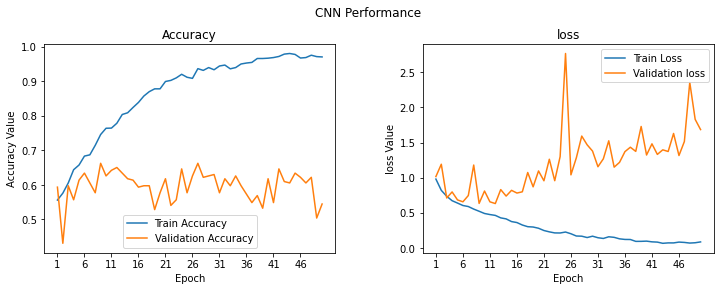

In [8]:
import matplotlib.pyplot as plt
f, (ax1, ax2) =plt.subplots(1,2,figsize=(12,4))
t=f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch=len(history.history['accuracy'])+1
epoch_list=list(range(1, max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label="Validation Accuracy")
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1=ax1.legend(loc='best')

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label="Validation loss")
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('loss')
l2=ax2.legend(loc='best')

model.save("CMO_attempt_CNN.h5")


# Dual-input sp500, CMO